<font color = 'blue'> <h1> <center> Processo Seletivo Poli Júnior - 2022.2  </center> </h1> </font> 
    <h2> <center> Núcleo de Produção - Analytics </center> </h2>
    

Olá, boas vindas ao Processo Seletivo 2022.2 da Poli Júnior! Essa é a versão do PS para quem deseja executar um entregável relacionado a área de Analytics.
O entregável de Analytics será exclusivamente feito em Python, usando algumas bibliotecas voltadas para a análise de dados em si. Seguem algumas regras gerais para o entregavel:<ul>
<li>A entrega consiste em enviar esse mesmo arquivo em .ipynb até às 23:59 horas do dia 07/09. <br></li>
<li>Disponibilizamos vídeos para introdução aos conteúdos cobrados, no link: <a href="https://drive.google.com/drive/folders/1zBT60x85c74fe0f9q_W-Y_8D343AAnVY?usp=sharing">https://drive.google.com/drive/folders/1zBT60x85c74fe0f9q_W-Y_8D343AAnVY?usp=sharing</a>
.</li><li> Além disso, há um grupo para tirar dúvidas, no link: <a href="https://chat.whatsapp.com/GTkYdCUpa6eBkIhrGF3epW">https://chat.whatsapp.com/GTkYdCUpa6eBkIhrGF3epW</a><br></li>
<li>Avaliaremos todo o conteúdo feito, não sendo necessesário o preenchimento de todos os itens para prosseguir a etapa de avaliação<br></li>
<li><b>NÃO SE IDENTIFIQUE NO ARQUIVO, APENAS COM O NÚMERO USP NO NOME DO ARQUIVO</b> <br></li>
    <li>Adicione quantas células forem necessárias<br></li>

<li>O resultado será corrigido de acordo com as informações da base, não se preocupe em ir atrás de dados on-line<br></li></ul>
<b>Obrigado pela atenção e bom entregável.</b>


# Parte 1: Perguntas diretas

A primeira parte do entregável consiste em perguntas diretas que devem ser respondidas no espaço destinado. A base escolhida contém dados de um famoso site de reviews sobre avaliações de restaurantes europeus, bem como classificações de ranking e faixa de preço.


A base consiste das seguinte colunas:
* Index: índice da linha da base de dados<br>

* Nome: nome do estabelecimento<br>

* Cidade: cidade do estabelecimento<br>

* Estilo culinário: estilos nos quais a cozinha do estabelecimento se enquadra<br>

* Ranking: posicionamento do estabelecimento na cidade <br>

* Nota: Avaliação média do estabelecimento, pode variar de 1 a 5<br>

* Faixa de preço: Categoria de preço <br>







#### Importação das bibliotecas utilizadas

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

#### Leitura da base de dados

In [2]:
reviews=pd.read_csv('reviews_restaurantes.csv')

# Questão 1 - Limpeza da base  
###  Na coluna "Nota", há valores negativos que não fazem sentido no contexto.

#### a) Informe a quantidade de valores negativos nessa coluna. 






In [3]:
err = []
cont = 0

# for loop que seleciona e armazena todos os valores nan do dataframe
for i in range(reviews.shape[0]):
    if(np.isnan(reviews.iloc[i][4])):
        err.append(i)
        cont = cont + 1

print("O numero de valores negativos encontrados eh de ", cont)

O numero de valores negativos encontrados eh de  9010


#### b) Remova as linhas com os valores da base e refaça a numeração do index.

In [4]:
# Corrige o dataframe removendo as linhas com valores negativos em sua nota
reviews.drop(err, axis=0, inplace=True)
reviews.reset_index(inplace=True)
reviews.drop('index', axis=1, inplace=True)

In [5]:
reviews

,Nome,Cidade,Estilo Culinário,Ranking,Nota,Faixa de Preço,Número de Reviews
0,Bavet,Brussels,"['Italian', 'Belgian', 'European']",1762.0,4.5,NaN,"2,0"
1,Bouillon des Colonies,Paris,['Vegetarian Friendly'],3877.0,4.0,$$ - $$$,"158,0"
2,Restaurante Passos de Fado,Lisbon,"['Portuguese', 'European']",2638.0,4.0,$$ - $$$,"37,0"
3,Ristorante Da Berti,Milan,"['Italian', 'Mediterranean', 'Vegetarian Frien...",974.0,4.0,$$ - $$$,"392,0"
4,Zinc Zinc,Lyon,"['French', 'Bar', 'European', 'Pub']",2475.0,2.5,$$ - $$$,"329,0"
...,...,...,...,...,...,...,...
109005,Nakagawa,Paris,"['Japanese', 'Sushi', 'Asian']",7232.0,4.0,$$ - $$$,"95,0"
109006,Donna Diana,Vienna,"['Italian', 'Mediterranean', 'Pizza']",1521.0,4.0,$$ - $$$,"17,0"
109007,Kacheti,Prague,[],3698.0,3.0,NaN,NaN
109008,Le Bistrot d'Henri,Paris,"['French', 'European', 'Vegetarian Friendly']",281.0,4.5,$$ - $$$,"695,0"


#### Para as questões seguintes, utilize a base obitda como resultado da questão 1
# Questão 2
#### a) Construa um dataframe que contenha as 5 cidades com mais restaurantes avaliados e suas respectivas quantidades. Considerar a quantidade de vezes que as cidades aparecem e não o número de reviews.


In [13]:
class cities():
    city = []
    totalrev = []
    totalcont = []
    
obj = cities()
    
# for loop que passa pelo dataframe lendo suas informacoes
# e armazenando-as nas variaveis e consertando seu formato
for i in range(reviews.shape[0]):
    rep = True
    name = reviews.iloc[i][1]
    rev  = str((reviews.iloc[i][6])).replace(',', '.')
    rev = float(rev)
    if(np.isnan(rev)):
        rev = 0
    

        
    # for loop que testa para que o nome da cidade não se repita
    for j, n in enumerate(obj.city):
        if(n == name):
            rep = False
            k = j

    # armaze na os dados da funcao, criando um novo elemento caso haja
    # a cidade na lista ou somando os dados nos elementos ja existentes
    if(rep):
        obj.city.append(name)
        obj.totalcont.append(1)
        obj.totalrev.append(rev)

    else:    
        obj.totalrev[k] += rev
        obj.totalcont[k] += 1

#Cria os dataframes limitando seu formato ao indicado pela proposta
    
obja = {'Cidade': obj.city, 'Restaurantes avaliados':obj.totalcont}

dfa = pd.DataFrame(data=obja)
dfa.sort_values(by='Restaurantes avaliados', ascending=False, inplace=True)
dfa.reset_index(inplace=True)
dfa.drop('index', axis=1, inplace=True)
dfa.drop(range(5, len(obj.city)), axis=0, inplace=True)

In [14]:
dfa

,Cidade,Restaurantes avaliados
0,London,14233
1,Paris,12969
2,Madrid,7954
3,Barcelona,7438
4,Berlin,6102


#### b) Construa um dataframe que contenha as 5 cidades com menor número de reviews totais em seus restaurantes em ordem do menor para o maior e os respectivos totais.


In [21]:
objb = {'Cidade': obj.city, 'Total de avaliacoes':obj.totalrev}

dfb = pd.DataFrame(data=objb)
dfb.sort_values(by='Total de avaliacoes', inplace=True)
dfb.reset_index(inplace=True)
dfb.drop('index', axis=1, inplace=True)
dfb.drop(range(5, len(obj.city)), axis=0, inplace=True)

In [22]:
dfb

,Cidade,Total de avaliacoes
0,Bratislava,41156.0
1,Ljubljana,41407.0
2,Luxembourg,46337.0
3,Helsinki,64379.0
4,Geneva,84317.0


# Questão 3

#### Construa um dataframe com os 10 melhores restaurantes de Lisboa (Lisbon) com 1 cifrão de acordo com o ranking em ordem do pior para o melhor avaliado. 


In [26]:
class restaurantes():
    nome = []
    ranking = []

    
obj = restaurantes()

'''
for loop que passa por todos os valores das cidades e precos do 
dataframe, testando se condizem com os do enunciado e adicionando-os
ao objeto para o novo dataframe
'''
for i in range(reviews.shape[0]):
    cidade = reviews.iloc[i][1]
    preco = reviews.iloc[i][5]
    if(cidade == 'Lisbon' and preco == '$'):
        obj.nome.append(reviews.iloc[i][0])
        obj.ranking.append(reviews.iloc[i][3])



# cria o dataframe e o adequa à proposta
objdf = {'Nome':obj.nome, 'Ranking':obj.ranking}
df = pd.DataFrame(data=objdf)
df.sort_values(by='Ranking',inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.drop(range(10, len(obj.nome)), axis=0, inplace=True)
df.sort_values(by='Ranking', ascending=False, inplace=True)

In [27]:
df

,Nome,Ranking
9,Restaurante Sucolento,45.0
8,Alto do Bairro,41.0
7,Frangasqueira Nacional,37.0
6,Floresta Das Escadinhas,34.0
5,Cultura do Hamburguer,33.0
4,Sanskar Nepal,12.0
3,Crisfama,9.0
2,Restaurante Mili,6.0
1,Ha Tapas no Mercado!!!,4.0
0,Estamine Art Food Drink,1.0


# Questão 4

#### a) Determine o estilo culinário que mais aparece dentre os restaurantes avaliados.

#### Dica: Para transformar as listas da coluna "Estilo Culinário", importe a biblioteca ast e se inspire no comando abaixo. Pense nele aplicado em um loop.



In [32]:
class count():
    estilo = []
    cont = []

obj = count()

# for loop que, para cada estilo culinario, conta o seu numero de aparicoes
# atrelando-os as listas do obj
for i in range(reviews.shape[0]):
    str1 = reviews.iloc[i][2]
    estilos = ast.literal_eval(str1)
    for j in range(len(estilos)):
        b = True
        for k in range(len(obj.estilo)):
            if(estilos[j] == obj.estilo[k]):
                b = False

        if(b):
            obj.estilo.append(estilos[j])
            obj.cont.append(1)

        ++obj.cont[j]
        
        
# Pega o estilo com maior contagem de acordo com as listas formadas no for
estilo = obj.estilo[np.argmax(obj.cont)]


print("O estilo culinario mais presente eh", estilo)

O estilo culinario mais presente eh Italian




1.   Item da lista
2.   Item da lista


#### b) Com base no estilo culinário encontrado acima, monte um dataframe que contenha apenas o melhor restaurante em que esse estilo aparece em cada cidade de acordo com o ranking. O dataframe resultado deve conter 3 colunas: nome do restaurante; cidade; ranking. 
##### Obs: O dataframe não necessariamente deve conter todas as cidades, caso não exista nenhum restaurante desse estilo culinário na cidade.

In [33]:
class restaurantes():
    nome = []
    cidade = []
    ranking = []
    
obj = restaurantes()
    
for i in range(reviews.shape[0]):
    str1 = reviews.iloc[i][2]
    styles = ast.literal_eval(str1)

    b1 = False
    for j, n in enumerate(styles):
        if(estilo == n):
            b1 = True

    if(b1):
        b2 = False
        b3 = False
        cidade = reviews.iloc[i][1]
        ranking = reviews.iloc[i][3]
        nome = reviews.iloc[i][0]
        for j, n in enumerate(obj.cidade):
            if(cidade == n):
                b2 = True
                if(ranking < obj.ranking[j]):
                    b3 = True
                    m = j

        if(b3):
            obj.ranking[m] = ranking
            obj.nome[m] = nome

        if(not b2):
            obj.cidade.append(cidade)
            obj.nome.append(nome)
            obj.ranking.append(ranking)

objaux = {'Cidade':obj.cidade, 'Ranking':obj.ranking, 'Nome':obj.nome}

dt = pd.DataFrame(data= objaux)

dt = dt.groupby("Cidade")

In [34]:
dt.min()

,Ranking,Nome
Cidade,,
Amsterdam,20.0,La Maschera Lillotatini
Athens,8.0,Oroscopo
Barcelona,12.0,BelleBuon
Berlin,2.0,La Gondola Due
Bratislava,3.0,Gatto Matto Ristorante
Brussels,5.0,Pasta Divina
Budapest,1.0,Comme Chez Soi
Copenhagen,4.0,Pizzeria MaMeMi WestMarket
Dublin,14.0,I Monelli


# Questão 5

#### a) Calcule a média de nota de avaliação dos restaurantes da base.

In [66]:
media = np.mean(reviews['Nota'])
print("A media de nota de avaliacao dos restaurantes eh de", media)

A media de nota de avaliacao dos restaurantes eh de 4.006256306760847



#### b) Construa um dataframe para todas as cidades que possua duas colunas: a cidade; a média de nota de avaliação dos restaurantes dessa cidade.

In [113]:
df = reviews
df = df.groupby("Cidade")
df = df.mean()
df.reset_index(inplace=True)

In [114]:
df

,Cidade,Nota
0,Amsterdam,4.121843
1,Athens,4.212078
2,Barcelona,3.984472
3,Berlin,4.137168
4,Bratislava,3.992045
5,Brussels,3.897778
6,Budapest,4.105607
7,Copenhagen,4.004732
8,Dublin,4.073904
9,Edinburgh,4.084026



#### c) A partir das informações obtidas, construa um gráfico de barras, que contenha no eixo x, as cidades, e no eixo y, a média da nota de avaliação dos restaurantes dessa cidade. Adicione também uma linha horizontal que represente a média geral obtida no item a).

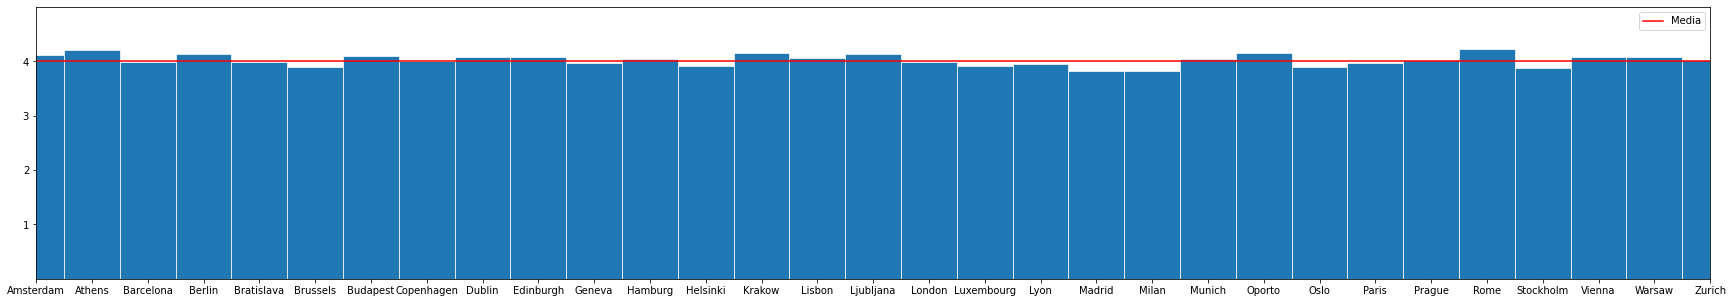

In [115]:
fig, ax = plt.subplots(figsize=(30,5))

x = df['Cidade']
y = df['Nota']

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, len(x) - 1), xticks=np.arange(0, len(x)),
       ylim=(0, 5), yticks=np.arange(1, 5))

ax.axhline(media,color='r', label='Media')

ax.legend()

plt.show()

# Parte 2: Análise

Chegamos na segunda parte do entregável!
Aqui será feita uma análise mais ampla do que o exercício anterior, por isso não tem um script com o que deve ser entregue. Por ser mais ampla e a análise variar de pessoa para pessoa, não tem uma única resposta correta. Todo raciocínio desenvolvido será avalidado, inclusive entender o que deve ser abordado ou não na análise.

Usaremos uma base diferente, em que estão representados os resultados da pesquisa de satisfação dos passageiros de uma companhia aérea.

O objetivo aqui é conseguir extrair insights que servirão de diferenciais competitivos para a área de customer service.

Tendo isso em vista, desenvolva uma análise exploratória dessa base de dados, buscando entender quais informações são relevantes para um cliente da companhia responder a pesquisa como satisfeito ou insatisfeito/neutro. Busque entender a relação entre as colunas e para iiotecas para te auxiliar, como: MatPlotLib e Pandas. Disponibilizaremos treinamentos sobre ambas bibliotecas.sso você pode utilizar algumas bibl
Além disso, você pode pesquisar outras bibliotecas disponíveis, como a Scikit-learn, para complementar a sua análise com métodos de Machine Learning como KNN, regressão logística, regressão linear, SVM e árvores de decisão. Lembrando que a utilização desses métodos não é obrigatória.



Explicação das colunas das bases

* Gender : Sexo do passageiro 

* Customer Type : Tipo do cliente 

* Age : Idade do cliente

* Type of Travel : Motivo da viagem

* Class : Tipo de serviço da passagem 

* Flight Distance : Distância percorrida na viagem 

* InFlight Wifi Service : Satisfação com o serviço de wi-fi. (0 representa a inexistência de wi-fi no voo)

* Departure/Arrival time convenient : Nível de satifação com a pontualidade do horário de partida e chegada 

* Ease of online booking : Nível de satisfação com a reserva online  

* Gate location : Nível de satisfação com a localização do portão de embarque

* Food and drink : Nível de satisfação com comidas e bebidas durante o voo 

* Online Boarding  : Nível de satisfação com o check-in online

* Seat Comfort  : Nível de satisfação com o comforto do assento

* Inflight entreteinment  : Nível de satisfação com o entretenimento a bordo

* On-board service  : Nível de satisfação com o serviço em voo

* Leg Room Service  : Nível de satisfação com o espaço para as pernas

* Baggage handling  : Nível de satisfação com o manuseio da bagagem

* Check-in service  : Nível de satisfação com o check-in presencial

* Inflight service  : Nível de satisfação com o serviço de bordo

* Cleanliness   : Nível de satisfação com o limpeza

* Departure delay in minutes : Minutos atrasados da partida voo em minutos

* Arrival delay in minutes  : Minutos atrasados da chegada do voo em minutos

* Satisfaction  : Satisfação com a companhia











In [ ]:
customer_df = pd.read_csv('clients_survey.csv')